# Inaugural Project

Imports and set magics:

In [2]:
#import numpy
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# import optmize
from scipy import optimize

# import plot
import matplotlib.pyplot as plt
# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exchange economy

To answer the questions we first define the equations defining the economy.

In [3]:
#constants
omegaA_1 = 0.8
omegaA_2 = 0.3

omegaB_1 = 1 - omegaA_1
omegaB_2 = 1 - omegaA_2

#utility functions
def u_A(x1, x2, alpha = 1/3):
    # finds the utility for consumer A
    return x1**alpha+x2**(1-alpha)

def u_B(x1, x2, beta = 2/3):
    #finds the utility of consumer B by taking consumer A's x1_A and x2_A as input (since x1_B = 1 - x_1_A)
    return (1-x1)**beta+(1-x2)**(1-beta)

#demand functions
def x1_A_star(omegaA_1, omegaA_2, p1, p2 = 1, alpha = 1/3):
    return alpha*(p1*omegaA_1+p2*omegaA_2)/p1

def x2_A_star(omegaA_1, omegaA_2, p1, p2 = 1, alpha = 1/3):
    return (1-alpha)*(p1*omegaA_1+p2*omegaA_2)/p2

def x1_B_star(omegaB_1,omegaB_2, p1, p2 = 1, beta = 2/3):
    return x1_A_star(omegaB_1, omegaB_2, p1, p2, beta)

def x2_B_star(omegaB_1, omegaB_2, p1, p2 = 1, beta = 2/3):
    return x2_A_star(omegaB_1, omegaB_2, p1, p2, beta)

# Question 1

Here we find the area $C$ by first defining N, the list of possible $x_1^A$ and $x_2^A$ and the endowment utilities. Next, we create two empty lists to store the values of $x_1^A$ and $x_2^A$ in $C$. To find these values, we create a loop that compares the utility of every combination of $x_1^A$ and $x_2^A$ to the endowment utilities. If the utility is greater than the endowment, $x_1^A$ and $x_2^A$ is stored in the two empty lists. Lastly, we plot the two lists in the edgeworth box. 

In [4]:
#constants
N = 75
x1_A = np.arange(0, 1+1/N, 1/N)
x2_A = np.arange(0, 1+1/N, 1/N)

#endowment utility
u_A_endow = u_A(omegaA_1,omegaA_2)
u_B_endow = u_B(omegaA_1, omegaA_2)

# check solutions using for loops
#define empty lists to store solutions
solutions_x1 = []
solutions_x2 = []

#loop over every combination of x1_A and x2_A 
for i in x1_A:
    for j in x2_A:
         if (u_A(i,j) >= u_A_endow) and (u_B(i,j) >= u_B_endow):
             solutions_x1.append(i)
             solutions_x2.append(j)
             # stores values of x1_A and x2_A if utility is higher than endowment utility for both consumers


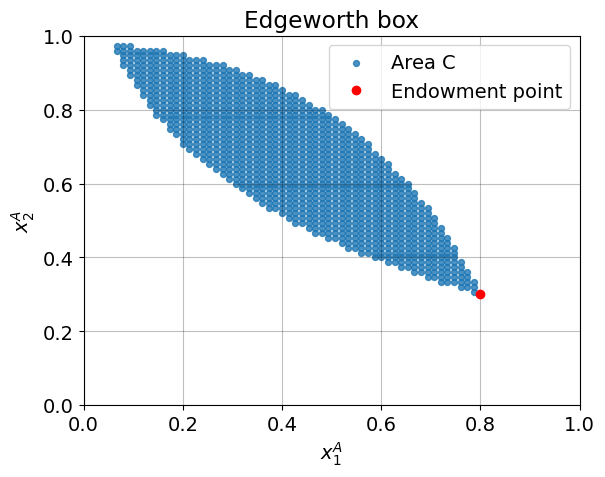

In [5]:
#below the solutions have been plotted
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(solutions_x1, solutions_x2, label= "Area C", s =18, alpha = 0.8)
ax. plot(omegaA_1, omegaA_2, 'ro', label = "Endowment point")

ax.set_title('Edgeworth box');
ax.set_xlabel('$x_1^A$');
ax.set_ylabel('$x_2^A$');
ax.set_xlim(0,1);
ax.set_ylim(0,1);
ax.legend();

# Question 2

To find the error in the market clearing conditions, we first define the $P_1$ area and then define the two errors as variables. Next, we plot both errors in the same plot to illustrate them.

In [6]:
#define P1 area
p1 = x1_A = np.arange(0.5, 2.5+2/N, 2/N)

#defining errors
error1 = x1_A_star(omegaA_1, omegaA_2, p1)-omegaA_1+x1_B_star(omegaB_1, omegaB_2, p1)-omegaB_1
error2 = x2_A_star(omegaA_1, omegaA_2, p1)-omegaA_2+x2_B_star(omegaB_1, omegaB_2, p1)-omegaB_2

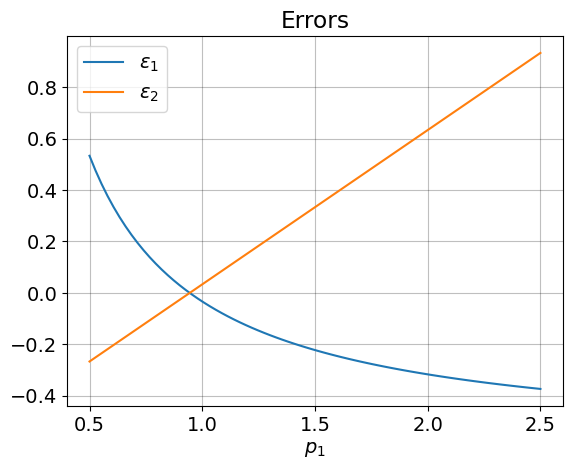

In [7]:
#plot
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)

ax.plot(p1, error1, label='$\epsilon_1$')
ax.plot(p1, error2, label='$\epsilon_2$')

ax.set_title('Errors')
ax.set_xlabel('$p_1$')
ax.legend(loc='upper left');

# Question 3

Here we find $p_1$ such that $\epsilon_1$ is minimized resulting in the market clearing price (we only need to check one, since when one market clears the other does as well). This is done using an optimizer that minimizes the objective function (error_min). This function simply returns the absolute value of $\epsilon_1$ given a specific $p_1$.

In [8]:
# objective function (to minimize) - absolute value of error 1
def error_min(p1, omegaA_1, omegaA_2, omegaB_1, omegaB_2):
    return np.absolute(x1_A_star(omegaA_1, omegaA_2, p1)-omegaA_1+x1_B_star(omegaB_1, omegaB_2, p1)-omegaB_1)

# call solver
sol_case1 = optimize.minimize_scalar(
    error_min,
    method='bounded',
    bounds=(0,2.5),
    args=(omegaA_1, omegaA_2, omegaB_1, omegaB_2))

# unpack solution
p1_clear = sol_case1.x

error1_clear = x1_A_star(omegaA_1, omegaA_2, p1_clear)-omegaA_1+x1_B_star(omegaB_1, omegaB_2, p1_clear)-omegaB_1
print("The p1 that clears the market is: "+str(p1_clear)+" resulting in an error_1 of: "+str(error1_clear))


The p1 that clears the market is: 0.9444444411276147 resulting in an error_1 of: 2.1071623335089384e-09


# Question 4

A)
To find the allocation, we first create two arrays containing $x_1^A*$ and $x_2^A*$ for all $p_1$ in the set $P_1$. For each value in the two arrays we compute $u_A$ and save the value if it's larger than the previous computed one. This is only done for combinations of $x_1^A*$ and $x_2^A*$ in the interval 0 to 1, as we are looking for an interior solution.

In [10]:
#x1_A and x2_A from p_1 set
x1_p1 = x1_B_star(omegaB_1, omegaB_2, p1)
x2_p1 = x2_B_star(omegaB_1, omegaB_2, p1)

# initialize max u_A
max_u_A = -np.inf
max_x1_B = -np.inf
max_x2_B = -np.inf


#Update and find max u_A from p1
for i in x1_p1:
    for j in x2_p1:
        # Check if the goods i and j are smaller or equal to 1
        if (1 >= i and 1 >= j):
            temp = u_A((1-i), (1-j))
            if temp > max_u_A:
                max_u_A = temp
                max_x1_B = i
                max_x2_B = j 

print("Max u_A is: " + str(max_u_A) + " with allocation x1B: " + str(max_x1_B)+ " and x2B " + str(max_x2_B))

Max u_A is: 1.6925726393139202 with allocation x1B: 0.32000000000000023 and x2B 0.26666666666666666


B)
Now we find the optimal allocation when the price is not limited to the set of P1. Here, we simply use scipy's minimize function including the market clearing constraints. 

In [11]:
# code
# objective function (to minimize) - absolute value of error 1
def utility_min(p1, omegaB_1, omegaB_2):
    x1B = x1_B_star(omegaB_1, omegaB_2, p1)
    x2B = x2_B_star(omegaB_1, omegaB_2, p1)

    return -( u_A((1-x1B), (1-x2B)) )

#We minmize the objective function
initial_val = 1 # initial guess for the optimizer

# Setting up constraint on xA1, xA2, xB1 and xB2 
budget_constraint1 = lambda x: 1-x1_A_star(omegaA_1, omegaA_2, x)-x1_B_star(omegaB_1, omegaB_2, x) #Constrain 1-xa1-xb1 can not be negative
budget_constraint2 = lambda x: 1-x2_A_star(omegaA_1, omegaA_2, x)-x2_B_star(omegaB_1, omegaB_2, x) #Constrain 1-xa2-xb2 can not be negative
constraints = ({'type':'ineq','fun':budget_constraint1},{'type':'ineq','fun':budget_constraint2})

# Run optmization
result = optimize.minimize(utility_min, initial_val,constraints=constraints, args=(omegaB_1, omegaB_2), method='SLSQP', options={'disp': True})

# Print results
print("P1: " + str(result.x))
print( "xb1: " + str(x1_B_star(omegaB_1, omegaB_2, result.x)) + " xb2: " + str(x2_B_star(omegaB_1, omegaB_2, result.x)))
print( "xa1: " + str(x1_A_star(omegaA_1, omegaA_2, result.x)) + " xa2: " + str(x2_A_star(omegaA_1, omegaA_2, result.x)))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.5107022006860826
            Iterations: 2
            Function evaluations: 4
            Gradient evaluations: 2
P1: [0.94444444]
xb1: [0.62745098] xb2: [0.2962963]
xa1: [0.37254902] xa2: [0.7037037]


We find the optimal price $p_1$ to be equal to the market clearing price from question 3 of $p_1$=9.4444

# Question 5

A) We use the solutions found in question 1 and find the maximum $u_A$ computed from this set. This is done by calculating the utility of each solution and save the value if it's larger than the previous computed one.

In [12]:

# initilize max value
u_A_maxA = -np.inf
x1_A_maxA = -np.inf
x2_A_maxA = -np.inf

# loop through possible max uA and save highest
for i in range(len(solutions_x1)):
     temp = u_A(solutions_x1[i], solutions_x2[i])
     if temp > u_A_maxA:
        u_A_maxA = temp
        x1_A_maxA = solutions_x1[i]
        x2_A_maxA = solutions_x2[i]

# print max u_A
print("Max u_A is: " + str(u_A_maxA) + " with allocation x1A: " + str(x1_A_maxA)+ ", x2A: " + str(x2_A_maxA) + ", x1B: " + str(1-x1_A_maxA)+ " and x2B: " + str(1-x2_A_maxA))
print("This still restuls in: " +str(u_B(x1_A_maxA, x2_A_maxA)) + ">" + str(u_B_endow))

Max u_A is: 1.6447474042465262 with allocation x1A: 0.48000000000000004, x2A: 0.8, x1B: 0.52 and x2B: 0.19999999999999996
This still restuls in: 1.2314529726738352>1.22989919107794


B) We again run optmization of $u_A$ but with the market clearing constraints.

In [13]:
# objective function (to minimize) - absolute value of error 1
def utility_min(xA):
    return -( u_A(xA[0], xA[1]) )

#We minmize the objective function
initial_val = [0.5,0.5] # initial guess for the optimizer

# Setting up constraint on xA1, xA2, xB1 and xB2 and uB
budget_constraint1 = lambda x: 1-x[0] #Constrain 1-xa1 can not be negative
budget_constraint2 = lambda x: 1-x[1] #Constrain 1-xa2 can not be negative
budget_constraint3 = lambda x: (u_B(x[0],x[1]) - u_B_endow-10**(-8)) #Constrain on uB(x1B, x2B)>uB(w1B, w2B) added -10**(-8) to make sure u_B is is larger than the endowed u_B

constraints = ({'type':'ineq','fun':budget_constraint1},{'type':'ineq','fun':budget_constraint2}, {'type':'ineq','fun':budget_constraint3})

# Run optmization
result5 = optimize.minimize(utility_min, initial_val,constraints=constraints, args=(), method='SLSQP', options={'disp': False})

# print results
# Print results
print("Max uA: " + str(u_A(result5.x[0], result5.x[1])) + " giving uB: " + str(u_B(result5.x[0], result5.x[1])) + " greater than " + str(u_B_endow))
print( "xa1: " + str(result5.x[0]) + " xa2: " + str(result5.x[1]))
print(u_B(result5.x[0], result5.x[1])-u_B_endow)

Max uA: 1.646551305822738 giving uB: 1.2298991996495041 greater than 1.22989919107794
xa1: 0.45897607565982107 xa2: 0.8187404524907691
8.571564125148257e-09


# Question 6

A) We do the same optmization as previous but with a new objective function

In [14]:
def utility_min(xA):
    return -( u_A(xA[0], xA[1])+u_B(xA[0], xA[1]) )

#We minmize the objective function
initial_val = [0.5,0.5] # initial guess for the optimizer

# Setting up constraint on xA1, xA2, xB1 and xB2
budget_constraint1 = lambda x: 1-x[0] #Constrain 1-xa1 can not be negative
budget_constraint2 = lambda x: 1-x[1] #Constrain 1-xa1 can not be negative

constraints = ({'type':'ineq','fun':budget_constraint1},{'type':'ineq','fun':budget_constraint2})

# Run optmization
result6 = optimize.minimize(utility_min, initial_val,constraints=constraints, args=(), method='SLSQP', options={'disp': False})

# print results
# Print results
print("uA: " + str(u_A(result6.x[0], result6.x[1])) + " and uB: " + str(u_B(result6.x[0], result6.x[1])) + " giving the objective function value of " + str(u_A(result6.x[0], result6.x[1])+u_B(result6.x[0], result6.x[1])))
print( "xa1: " + str(result6.x[0]) + " xa2: " + str(result6.x[1]))
print( "xb1: " + str(1-result6.x[0]) + " xb2: " + str(1-result6.x[1]))

uA: 1.4578186168313727 and uB: 1.4578186893314227 giving the objective function value of 2.9156373061627954
xa1: 0.29655906684582234 xa2: 0.7034408847938111
xb1: 0.7034409331541777 xb2: 0.29655911520618894


B) The two consumers recieve the same amount of opposite goods. This is as expected since the two consumer are identical with respect to opposite goods (the demand functions are identical, it is only the value of $\alpha$ and $\beta$ that differs).

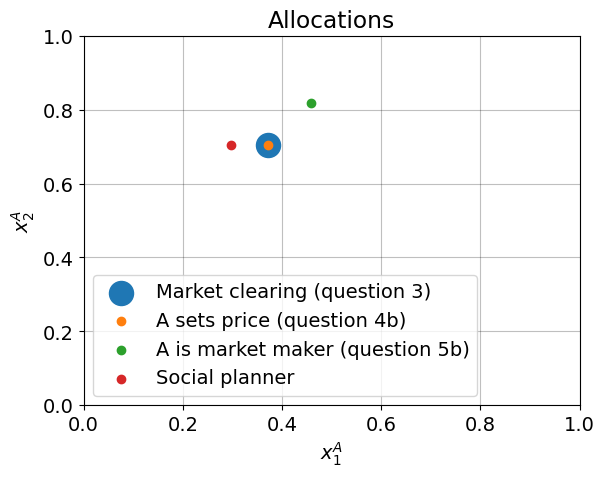

In [36]:
# allocation from market clearing price in question 3
p1_clear_x1_A = 1 - x1_B_star(omegaB_1, omegaB_2, p1_clear)
p1_clear_x2_A = 1 - x2_B_star(omegaB_1, omegaB_2, p1_clear)

#allocation from A sets p1 in question 4.b
A_choice_x1_A = 1- x1_B_star(omegaB_1, omegaB_2, result.x)
A_choice_x2_A = 1- x2_B_star(omegaB_1, omegaB_2, result.x)

#plot allocations
fig3 = plt.figure()
ax = fig3.add_subplot(1,1,1)

ax.scatter(p1_clear_x1_A, p1_clear_x2_A, label='Market clearing (question 3)', s = 300)
ax.scatter(A_choice_x1_A, A_choice_x2_A, label = "A sets price (question 4b)")
ax.scatter(result5.x[0], result5.x[1], label = "A is market maker (question 5b)")
ax.scatter(result6.x[0], result6.x[1], label = "Social planner")

ax.set_title('Allocations')
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_xlim(0,1);
ax.set_ylim(0,1);
ax.legend(loc='lower left');



From the plot we can see that the allocation is the same for market clearing and when A sets $p_1$, since A does not have any market power in this situation as the market still needs to clear. If however, A has some market power as in question 5) it results in A consuming more of both goods. In the social optimum A consumes less of $x_1$ as opposed to the market clearing allocation, where A consumes more of $x_1$, since A has a higher total endowment of both goods.  

# Question 7

Here, we use numpy to draw random numbers from a uniform distribution.

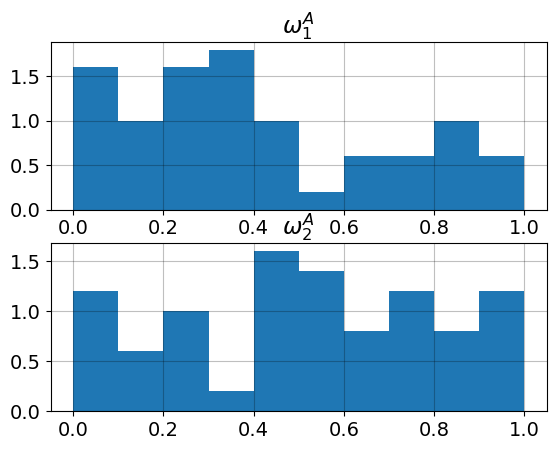

In [216]:
# Elements in set
elements = 50

# Generate w
W = np.random.uniform(low=[0,0],high=[1,1],size=(elements,2))

# plot
fig = plt.figure()
bins = np.linspace(0, 1, 11)
ax1 = fig.add_subplot(2,1,1)
ax1.hist(W[:,0],bins=bins,density=True,histtype='stepfilled');
ax2 = fig.add_subplot(2,1,2)
ax2.hist(W[:,1],bins=bins,density=True,histtype='stepfilled');
ax1.set_title('$\omega_1^A$');
ax2.set_title('$\omega_2^A$');

Above the histograms of w1A and w2A in W are shown.

# Question 8

We follow the same procedure as in question 3 for all possible $\omega_1^A$ and $\omega_2^A$. Hence, we minimize error1 until the market clears for different values of $\omega_1^A$ and $\omega_2^A$.

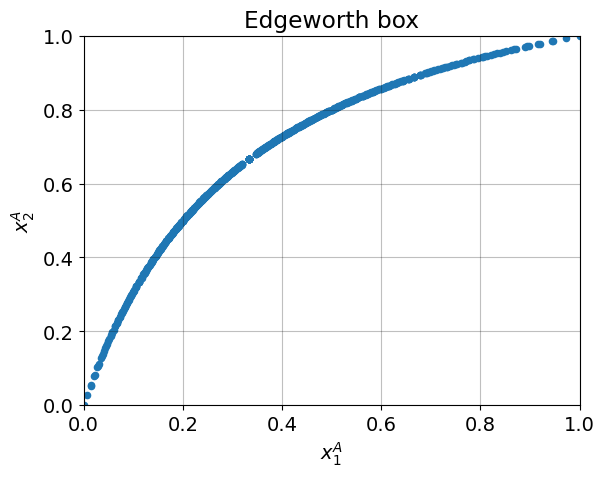

In [41]:
# objective function (to minimize) - absolute value of error 1
def error_min(p1, omegaA_1, omegaA_2, omegaB_1, omegaB_2):
    return np.absolute(x1_A_star(omegaA_1, omegaA_2, p1)-omegaA_1+x1_B_star(omegaB_1, omegaB_2, p1)-omegaB_1)

# Define wa1 and wa2 to be checked
wa1 = np.linspace(0,1,25) # Specify the values of wa1 and wa2 to be used. Here we use 25 values equally distributed between 0 and 1
wa2 = wa1

# init optimal allocation arrays
xa1_opt = np.zeros([len(wa1), len(wa2)])
xa2_opt = np.zeros([len(wa1), len(wa2)])

# nitial price guess for the solve
initial_val = 1

# Create for loop across all wa1 and wa2

for i in range(len(wa1)):
    for j in range(len(wa2)):
        # Creat price constrain ei price can not be negative
        budget_constraint1 = lambda x: 1-x1_A_star(wa1[i], wa2[j], x) #Constrain 1-xa1 can not be negative
        budget_constraint2 = lambda x: 1-x2_A_star(wa1[i], wa2[j], x) #Constrain 1-xa1 can not be negative
        budget_constraint3 = lambda x: x1_A_star(wa1[i], wa2[j], x) #Constrain xa1 can not be negative
        budget_constraint4 = lambda x: x2_A_star(wa1[i], wa2[j], x) #Constrain xa2 can not be negative
        
        constraints = ({'type':'ineq','fun':budget_constraint1},{'type':'ineq','fun':budget_constraint2}, {'type':'ineq','fun':budget_constraint3}, {'type':'ineq','fun':budget_constraint4})

        # Run optmization to find clearing price
        result8 = optimize.minimize(error_min, initial_val,constraints=constraints, args=(wa1[i], wa2[j], 1-wa1[i], 1-wa2[j]), method='SLSQP', options={'disp': False})

        # Compute and save optmial allocations based on optimal price
        xa1_opt[i][j] = x1_A_star(wa1[i], wa2[j], result8.x)[0]
        xa2_opt[i][j] = x2_A_star(wa1[i], wa2[j], result8.x)[0]

        
# Plot allocations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(xa1_opt, xa2_opt, s = 20)

ax.set_title('Edgeworth box');
ax.set_xlabel('$x_1^A$');
ax.set_ylabel('$x_2^A$');
ax.set_xlim(0,1);
ax.set_ylim(0,1);